In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

In [3]:
filename="new_data.csv"

pdf=pd.read_csv(filename)
print("Shape of dataset: ",pdf.shape)

pdf.head()

Shape of dataset:  (200, 4)


,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [5]:
featureset = pdf[['Gender',  'Age', 'Annual_Income', 'Spending_Score']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values 
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [8]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

/tmp/ipykernel_9817/458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

In [9]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/tmp/ipykernel_9817/227076933.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [10]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([20, 20,  1,  7, 10,  7,  1,  7, 14,  7, 14,  7,  2,  7, 16, 20, 10,
       20, 15,  7, 16, 20,  2, 20,  2, 20, 10, 17, 10,  7, 14,  7, 14, 20,
        2,  7, 10,  7, 10,  7,  3, 20, 17,  9, 10,  7, 11,  9,  9,  9, 11,
       17,  9, 15, 11, 17, 11, 15,  9, 15, 15, 21,  3, 11, 15, 21, 11,  3,
       21,  9, 15, 11,  3,  3, 15, 21, 11, 17,  9, 11, 15, 17, 15, 11,  9,
       17, 11,  9, 11, 11,  3, 21, 17, 11,  9, 21, 11,  9, 17, 21,  9, 11,
       15, 21, 17,  9,  3, 15, 15, 15, 15,  9, 11, 21,  9,  9,  3, 11, 11,
       11, 21, 11, 11, 19,  9,  8, 17, 19, 12, 21, 12, 21,  9,  8, 13,  6,
        4, 21, 13,  8,  5, 19,  9,  6, 13, 19, 17,  8,  4, 19, 12, 19,  4,
        8,  4,  6, 12,  8, 12,  8,  3,  6, 13,  6, 12,  8, 12,  6,  4, 21,
       12, 21, 12, 19,  5,  6, 12, 21, 12, 19,  4,  6, 12,  6,  4, 19,  5,
       21,  4,  6,  4,  6, 13,  6,  5,  6,  5, 18, 13, 18], dtype=int32)

In [11]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([5, 5, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 5, 2, 5, 3, 2, 4, 5,
       1, 5, 1, 5, 2, 4, 2, 2, 3, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 5, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 5, 1, 2, 3, 5,
       2, 1, 5, 2, 3, 2, 1, 1, 3, 5, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 5, 4, 2, 2, 5, 2, 2, 4, 5, 2, 2, 3, 5, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 5, 2, 2, 1, 2, 2, 2, 5, 2, 2, 5, 2, 2, 4, 5, 3, 5, 3, 5,
       2, 2, 3, 2, 1, 5, 3, 2, 1, 5, 2, 2, 3, 5, 4, 2, 1, 5, 3, 5, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 5, 3, 5, 3, 5, 1, 2,
       3, 5, 3, 5, 1, 2, 3, 2, 1, 5, 1, 5, 1, 2, 1, 2, 3, 2, 1, 2, 1, 5,
       3, 5], dtype=int32)

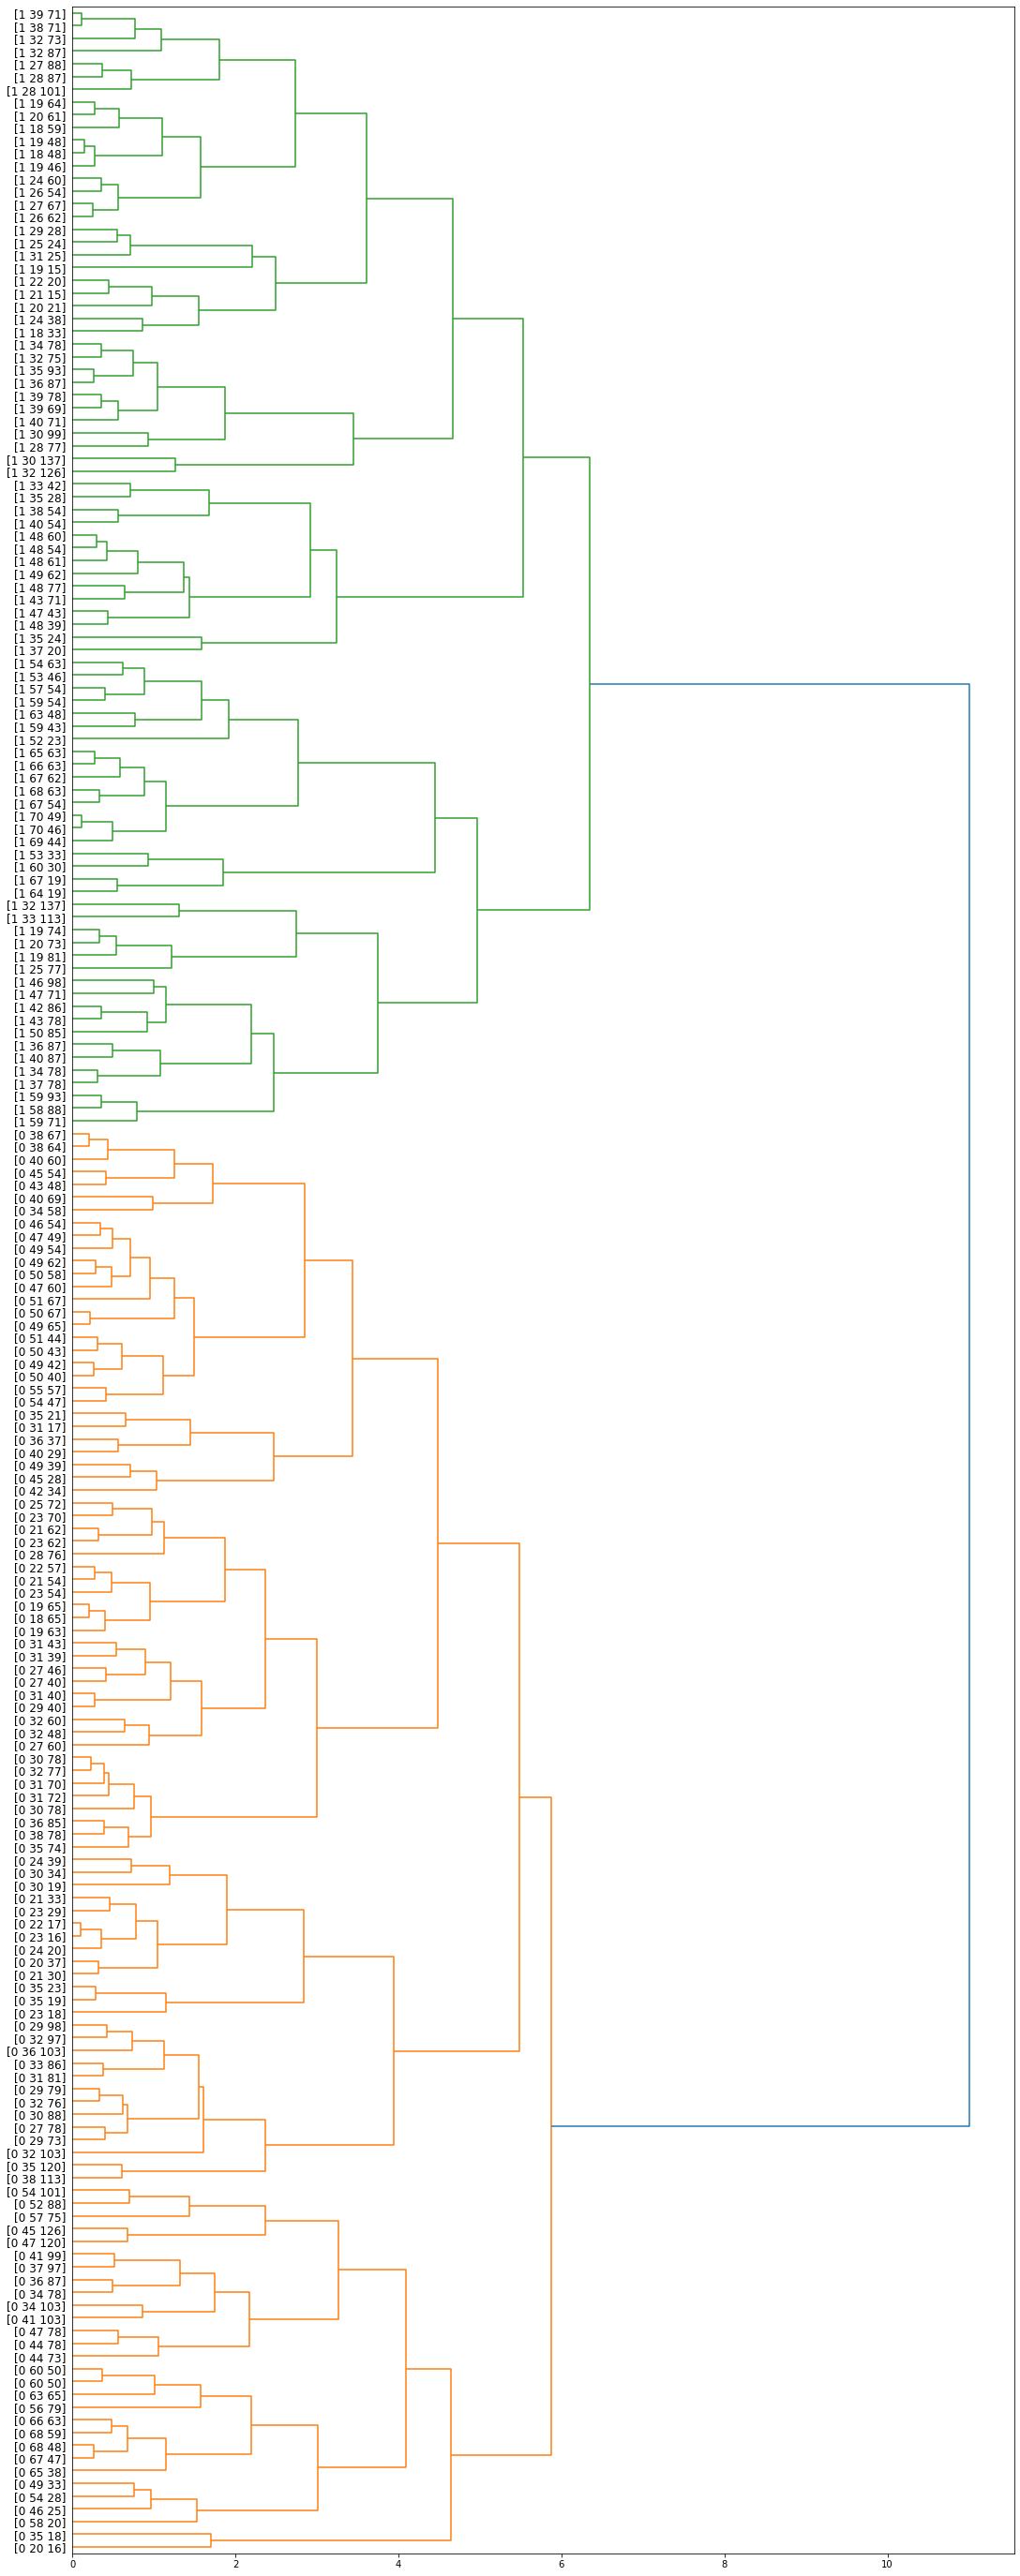

In [12]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Gender'][id], pdf['Age'][id], int(float(pdf['Annual_Income'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix) 

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [14]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_9817/1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


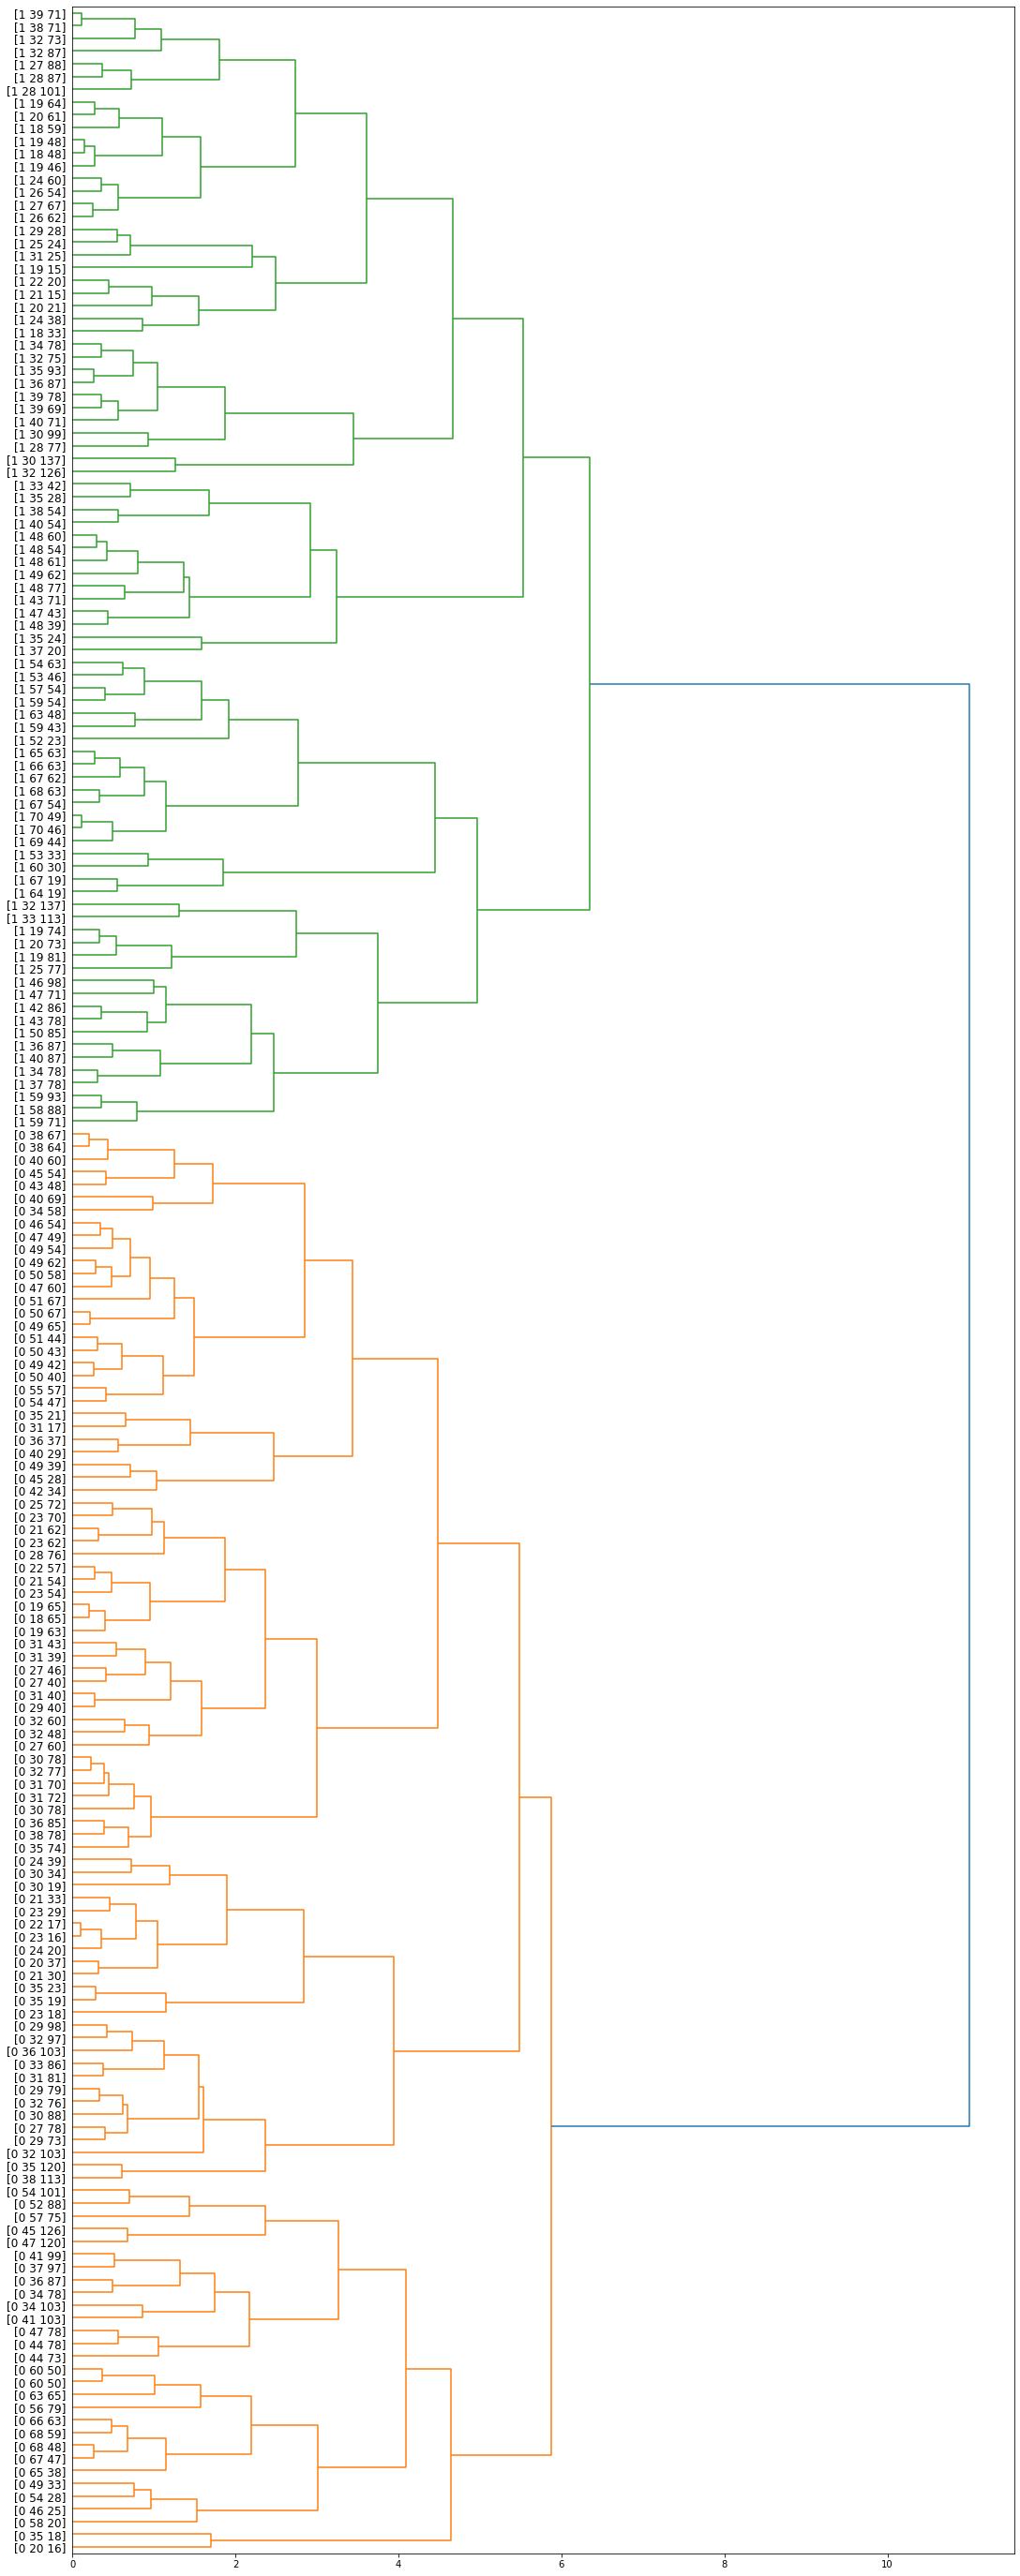

In [16]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Gender'][id], pdf['Age'][id], int(float(pdf['Annual_Income'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [17]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/sina/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5, 3, 5, 4, 1, 2, 1, 0, 5, 4, 1,
       3, 1, 3, 1, 2, 4, 2, 5, 0, 5, 0, 1, 3, 5, 2, 5, 2, 5, 3, 1, 4, 2,
       2, 5, 2, 2, 2, 2, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 0, 1, 3, 2, 0, 1,
       2, 3, 1, 2, 0, 2, 3, 3, 0, 1, 2, 4, 2, 2, 0, 4, 0, 2, 2, 4, 2, 2,
       2, 2, 3, 1, 4, 2, 2, 1, 2, 2, 4, 1, 2, 2, 0, 1, 4, 2, 3, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 4, 1, 0, 1, 0, 1,
       2, 2, 0, 5, 3, 1, 0, 2, 3, 1, 2, 5, 0, 1, 4, 2, 3, 1, 0, 1, 3, 2,
       3, 5, 0, 2, 0, 2, 3, 5, 0, 5, 0, 2, 0, 5, 3, 1, 0, 1, 0, 1, 3, 5,
       0, 1, 0, 1, 3, 5, 0, 5, 3, 1, 3, 1, 3, 5, 3, 5, 0, 5, 3, 5, 3, 1,
       0, 1])

In [21]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Annual_Income')

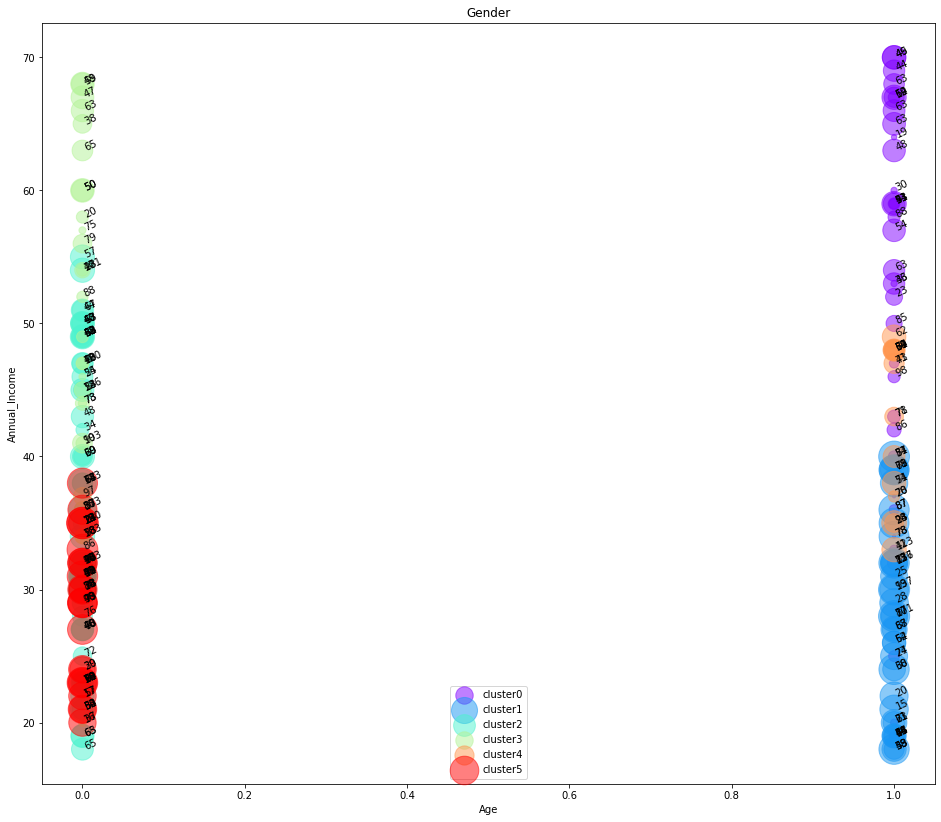

In [23]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Gender[i], subset.Age[i],str(subset['Annual_Income'][i]), rotation=25) 
    plt.scatter(subset.Gender, subset.Age, s= subset.Spending_Score*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Gender')
plt.xlabel('Age')
plt.ylabel('Annual_Income')

In [25]:
pdf.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         1         37
1         1         37
2         0         57
3         0         29
4         1         14
5         0         26
Name: cluster_, dtype: int64

In [27]:
agg_cars = pdf.groupby(['cluster_','Gender'])[['Gender','Age','Annual_Income','Spending_Score']].mean()
agg_cars

,,Gender,Age,Annual_Income,Spending_Score
cluster_,Gender,,,,
0,1,1.0,50.864865,65.702703,26.081081
1,1,1.0,27.675676,63.675676,72.729730
2,0,0.0,36.403509,55.473684,49.701754
3,0,0.0,49.931034,67.068966,26.620690
4,1,1.0,42.642857,49.214286,43.785714
5,0,0.0,28.615385,58.807692,83.307692


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Annual_Income')

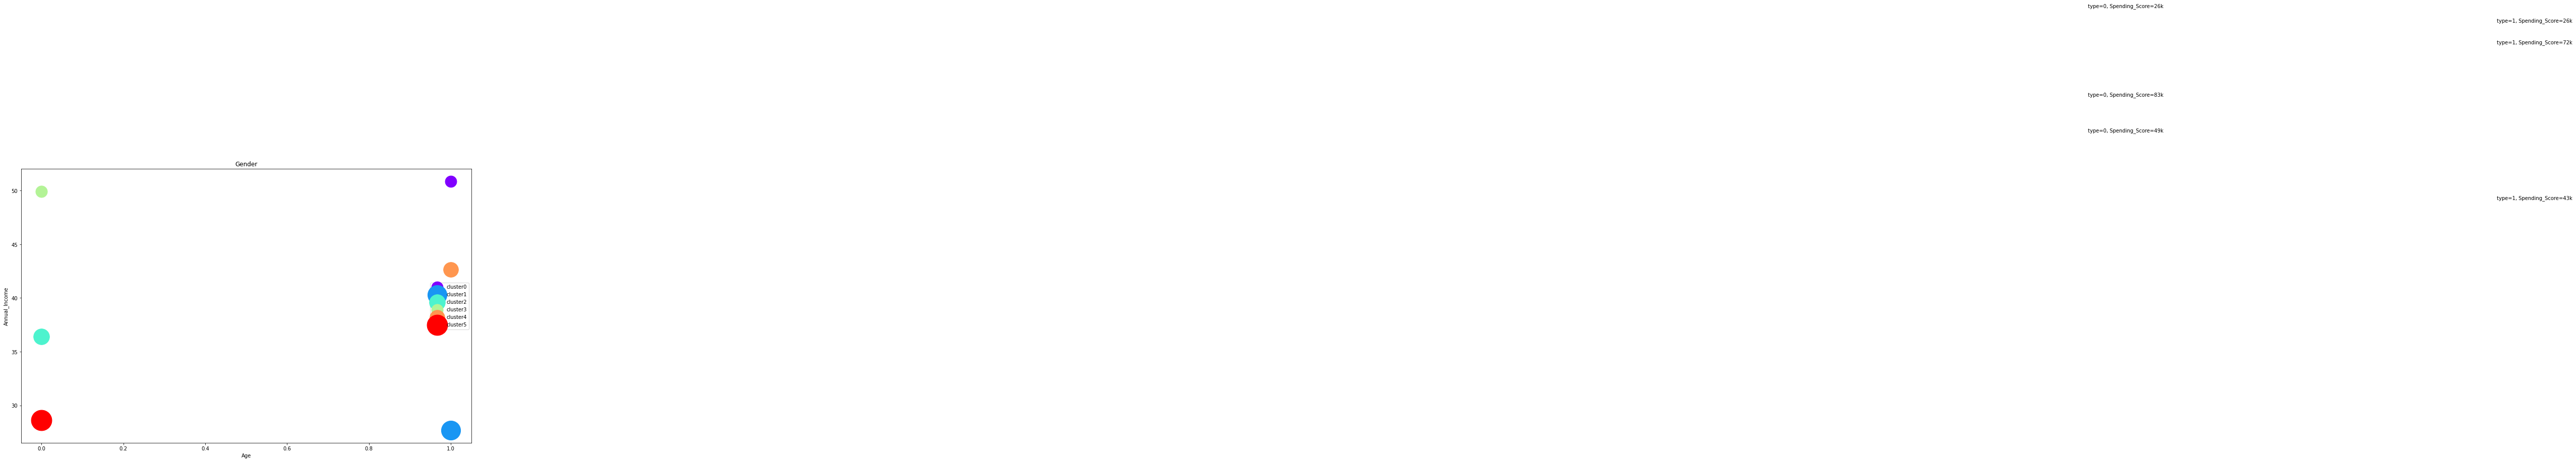

In [32]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', Spending_Score='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.Gender, subset.Age, s=subset.Spending_Score*20, c=color, label='cluster'+str(label))
    
plt.legend()
plt.title('Gender')
plt.xlabel('Age')
plt.ylabel('Annual_Income')